In [1]:
### Load necessary modules -------------------------------
# interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_theme()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import chardet
pd.set_option("display.max_colwidth", None)  # Evita que las columnas de texto se trunquen
from IPython.display import display

# Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from scipy.stats import norm
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from neuralsens import partial_derivatives as ns


from funciones_previas import *
from funciones_clasificacion import *

#  CARPETA SOLAR - IA

## LECTURA Y LIMPIEZA CSV

In [2]:
def lectura_limpieza_csv_alarmas(nombre_csv):
    """
    Dado el CSV con las info de las alarmas, lo convierte en un dataframe de Pandas.
    """
    #Ver la codificación del CSV
    with open(nombre_csv, "rb") as f:
        result = chardet.detect(f.read())
    print("Codificación detectada:", result["encoding"])
    
    # Leer el CSV con la expresión regular (me permite obtener correctamente las 4 columnas, sin columnas añadidas redundantes)
    regex_pattern = r"(\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}) \((\d+)\) - (ALARM_\d+)\s+(.*)"
    alarmas = pd.read_csv(nombre_csv, 
                      sep=regex_pattern, 
                      engine="python",  
                      names=["FechaHora", "Codigo", "Alarma", "Descripcion"],  
                      usecols=[1, 2, 3, 4],  # Ignorar la columna extra generada por regex
                      encoding=result["encoding"])
    return alarmas

In [3]:
#LECTURA DE LOS CSVs DE LA CARPETA SOLAR-IA
csvs_alarmas = ["alarms_register_20241211_120934 (1).csv",
                "Solar-IA/INV34/alarms_register_20250215_081729.csv",
                "Solar-IA/INV33/alarms_register_20250215_081430.csv",
                "Solar-IA/INV4/alarms_register_20250215_081158.csv",
               "Solar-IA/INV2/alarms_register_20250215_080923.csv"]

alarmas_1 = lectura_limpieza_csv_alarmas(csvs_alarmas[0])
alarmas_34 = lectura_limpieza_csv_alarmas(csvs_alarmas[1])
alarmas_33 = lectura_limpieza_csv_alarmas(csvs_alarmas[2])
alarmas_4 = lectura_limpieza_csv_alarmas(csvs_alarmas[3])
alarmas_2 = lectura_limpieza_csv_alarmas(csvs_alarmas[4])

#display(alarmas_1)
#display(alarmas_34)
#display(alarmas_33)
#display(alarmas_4)
#display(alarmas_2)

Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1


In [4]:
#LECTURA DEL CSV DE ALARMAS DEL DÍA 12-02-25 (FALLO PÉRDIDA PRESIÓN)
csv_perdida_presion_120225 = "/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/FalloPerdidaPresion_Pruebas 12_02_25/FALLO DE PERDIDA DE PRESI‡N/alarms_register_20250212_092625.csv"

alarmas_fallo_presion_120225 = lectura_limpieza_csv_alarmas(csv_perdida_presion_120225)

Codificación detectada: ISO-8859-1


In [5]:
#LECTURA CSV DE ALARMAS DEL DÍA 13-02-25
csv_explosion_congelar_130225 = "/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/FalloExplosionTrasCongelarPruebas 13_02_25/inv11/alarms_register_20250213_084618.csv"
alarmas_fallo_explosion_congelar_130225 = lectura_limpieza_csv_alarmas(csv_explosion_congelar_130225)

Codificación detectada: ISO-8859-1


In [6]:
#LECTURA CSV DE ALARMAS DEL DÍA 14-02-25
csvs_alarmas_140225 = ["/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/DatosPruebas 14_02_25/INV34/alarms_register_20250214_082658.csv",
                "/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/DatosPruebas 14_02_25/INV33/alarms_register_20250214_082012.csv",
                "/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/DatosPruebas 14_02_25/INV4/alarms_register_20250214_081722.csv",
                "/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/DatosPruebas 14_02_25/INV2/alarms_register_20250214_081326.csv"]

alarmas_34_140225 = lectura_limpieza_csv_alarmas(csvs_alarmas_140225[0])
alarmas_33_140225 = lectura_limpieza_csv_alarmas(csvs_alarmas_140225[1])
alarmas_4_140225 = lectura_limpieza_csv_alarmas(csvs_alarmas_140225[2])
alarmas_2_140225 = lectura_limpieza_csv_alarmas(csvs_alarmas_140225[3])

Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1


In [7]:
#LECTURA CSV DE ALARMAS DEL DÍA 15-02-25
csvs_alarmas_150225 = ["/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/DatosPruebas 15_02_25/INV34/alarms_register_20250215_081729.csv",
                "/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/DatosPruebas 15_02_25/INV33/alarms_register_20250215_081430.csv",
                "/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/DatosPruebas 15_02_25/INV4/alarms_register_20250215_081158.csv",
                "/Users/lucialopez/Documents/MBD/Segundo_cuatrimestre/TFM/Datos_TFMGamesa/DatosPruebas 15_02_25/INV2/alarms_register_20250215_080923.csv"]

alarmas_34_150225 = lectura_limpieza_csv_alarmas(csvs_alarmas_150225[0])
alarmas_33_150225 = lectura_limpieza_csv_alarmas(csvs_alarmas_150225[1])
alarmas_4_150225 = lectura_limpieza_csv_alarmas(csvs_alarmas_150225[2])
alarmas_2_150225 = lectura_limpieza_csv_alarmas(csvs_alarmas_150225[3])

Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1
Codificación detectada: ISO-8859-1


#### VEAMOS LAS FECHAS DE LAS ALARMAS

In [8]:
def fechas_alarmas(nombre_df):
    """
    Dado un dataframe de las alarmas, devuelve una lista con todas las fechas que aparecen (sin repeticiones) ordenadas cronológicamente.
    """
    # Convertir la columna 'FechaHora' a tipo datetime (con solo año, mes y día)
    fechas = pd.to_datetime(nombre_df['FechaHora'].str[:10], errors='coerce').dt.date

    # Reemplazar NaT por una fecha muy temprana (1 de enero de 1900)
    fechas = fechas.fillna(np.datetime64('1900-01-01', 'D'))

    # Obtener las fechas distintas y ordenarlas cronológicamente
    fechas = fechas.unique()

    # Ordenar las fechas cronológicamente
    fechas = sorted(fechas)
    return fechas

In [9]:
fechas_1 = fechas_alarmas(alarmas_1)
fechas_34 = fechas_alarmas(alarmas_34)
fechas_33 = fechas_alarmas(alarmas_33)
fechas_4 = fechas_alarmas(alarmas_4)
fechas_2 = fechas_alarmas(alarmas_2)

#fechas_1
#fechas_34
#fechas_33
#fechas_4
#fechas_2

## PLOTEAMOS HISTOGRAMAS

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_alarm_histograms(df_list, df_names):
    """
    Dado una lista de dataframes con la info de alarmas, plotea una gráfica con histogramas para ver las frecuencias de las alarmas
    
    """
    
    # Número de DataFrames en la lista
    n = len(df_list)
    
    # Iterar sobre la lista de DataFrames
    for i, df in enumerate(df_list):
        # Crear una nueva figura para cada gráfico
        plt.figure(figsize=(14, 5))  # Tamaño de la figura para cada histograma

        # Agrupar por tipo de alarma
        df_agrupado = df.groupby("Alarma").size().reset_index(name="Número de alarmas")
        
        # Ordenar los datos de mayor a menor
        df_sorted = df_agrupado.sort_values(by="Número de alarmas", ascending=False)

        # Extraer solo el número de la alarma (por ejemplo, 'ALARM_033' -> '033')
        df_sorted["Alarma"] = df_sorted["Alarma"].str.extract(r"(\d+)", expand=False)

        # Crear el gráfico de barras
        sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)

        # Etiquetas y título para cada gráfico
        plt.xlabel("Número de alarmas", fontsize=12)
        plt.ylabel("Tipo de Alarma", fontsize=10)
        plt.title(f"Frecuencia de Alarmas - DF {df_names[i]}", fontsize=14)
        plt.grid(axis="x", linestyle="--", alpha=0.7)

        # Ajustar etiquetas del eje X para que no se solapen
        plt.xticks(rotation=90, ha='center', fontsize=10)  # Girar las etiquetas de las alarmas 90 grados y centrarlas
        plt.tick_params(axis='y', labelsize=10)  # Reducir tamaño de etiquetas si hay muchas

        # Mostrar la figura para este DataFrame
        plt.tight_layout()  # Ajustar el layout para que no se solapen las etiquetas
        plt.show()  # Mostrar el gráfico



In [11]:
lista_df_alarmas = [alarmas_1,
                    alarmas_34,
                    alarmas_33,
                    alarmas_2,
                    alarmas_4,
                    alarmas_fallo_presion_120225,
                    alarmas_fallo_explosion_congelar_130225,
                    alarmas_34_140225,
                    alarmas_33_140225,
                    alarmas_4_140225,
                    alarmas_2_140225,
                    alarmas_34_150225,
                    alarmas_33_150225,
                    alarmas_4_150225,
                    alarmas_2_150225 
                   ]

lista_nombres_df_alarmas = ["alarmas_1",
                    "alarmas_34",
                    "alarmas_33",
                    "alarmas_2",
                    "alarmas_4",
                    "alarmas_fallo_presion_120225",
                    "alarmas_fallo_explosion_congelar_130225",
                    "alarmas_34_140225",
                    "alarmas_33_140225",
                    "alarmas_4_140225",
                    "alarmas_2_140225",
                    "alarmas_34_150225",
                    "alarmas_33_150225",
                    "alarmas_4_150225",
                    "alarmas_2_150225" 
                   ]

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


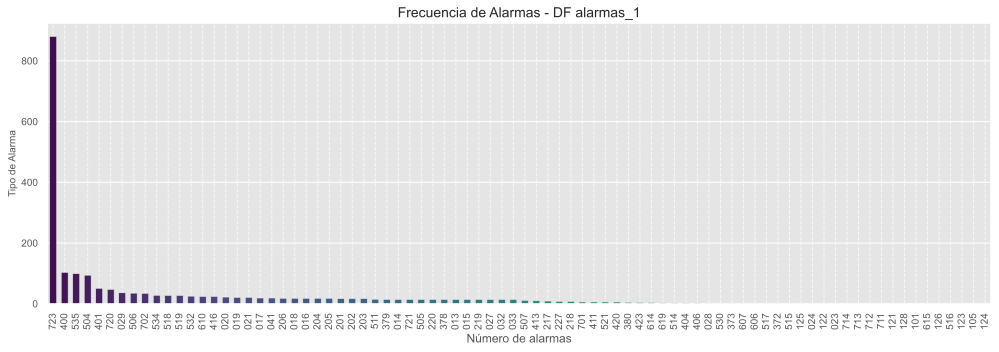

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


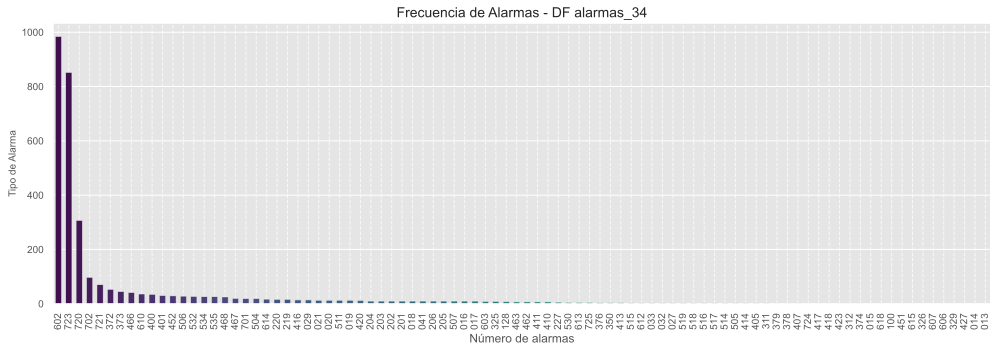

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


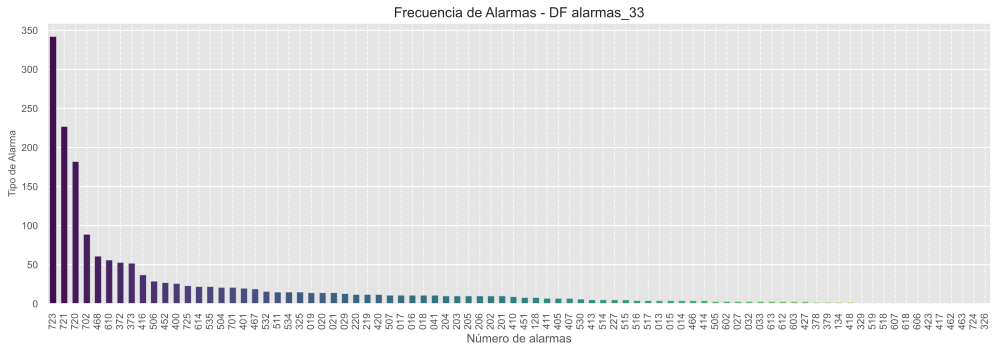

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


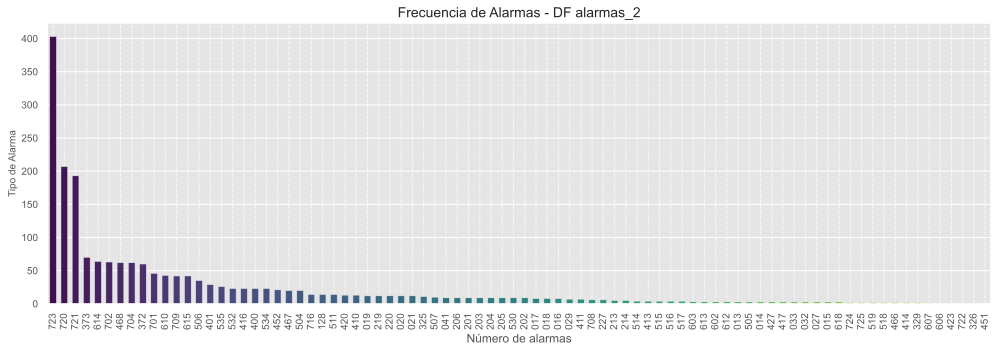

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


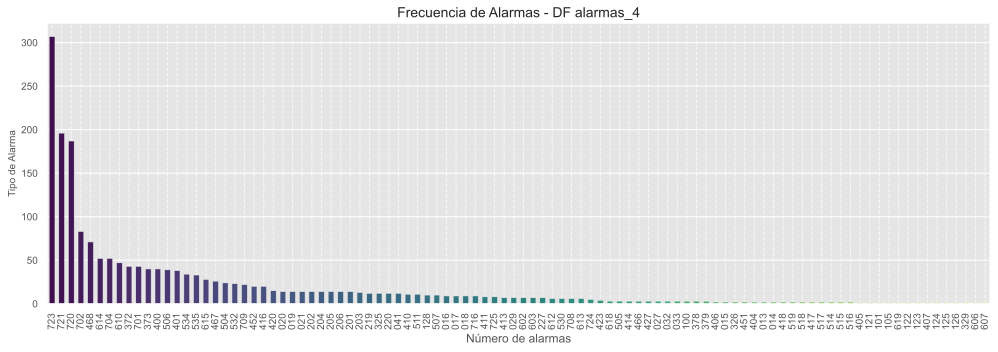

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


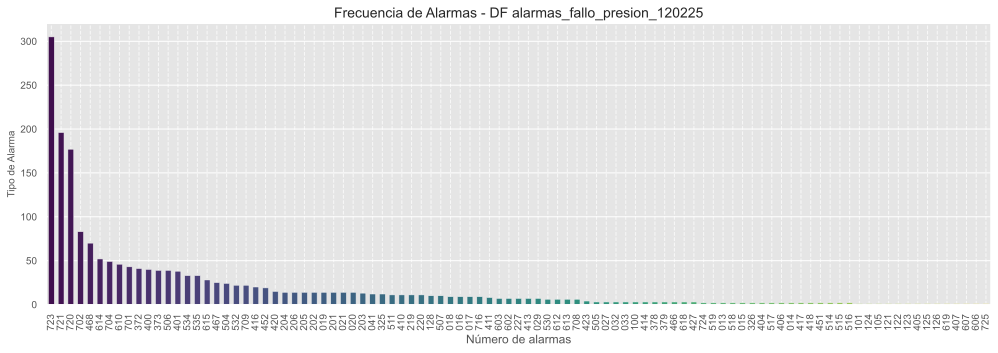

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


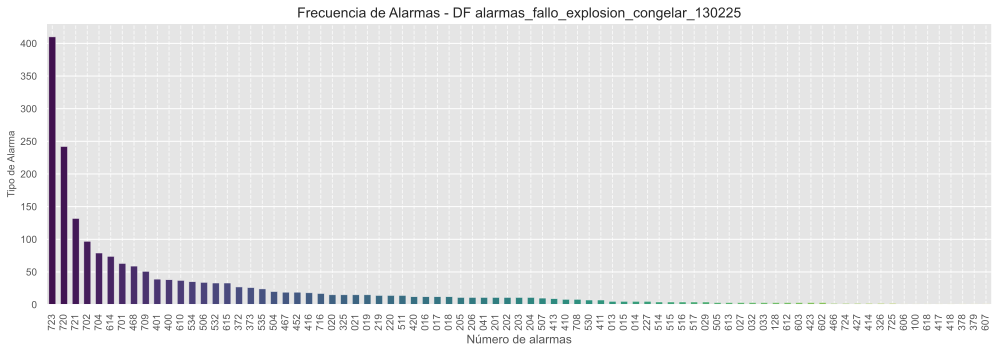

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


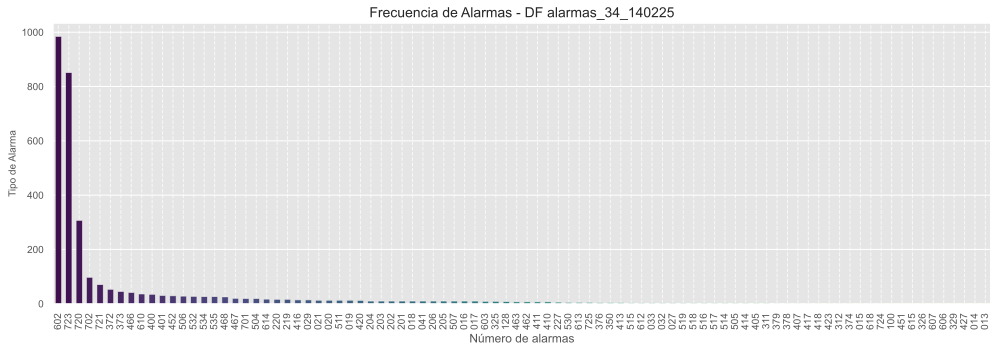

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


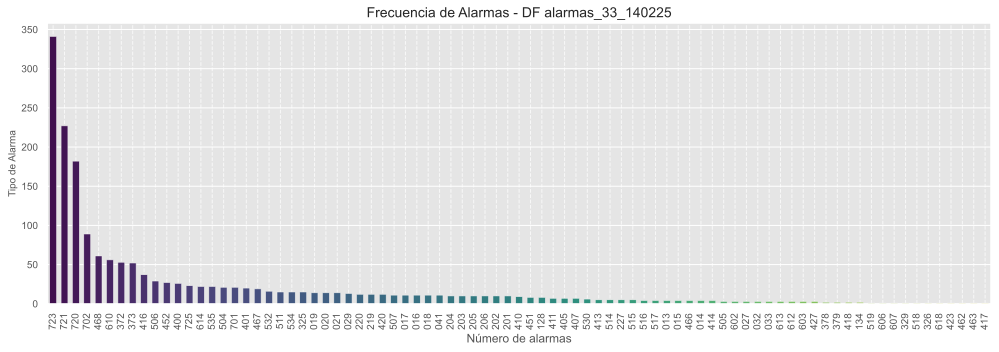

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


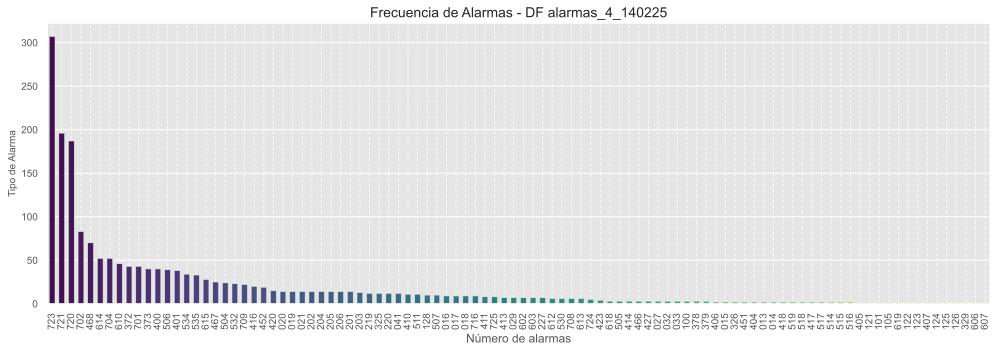

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


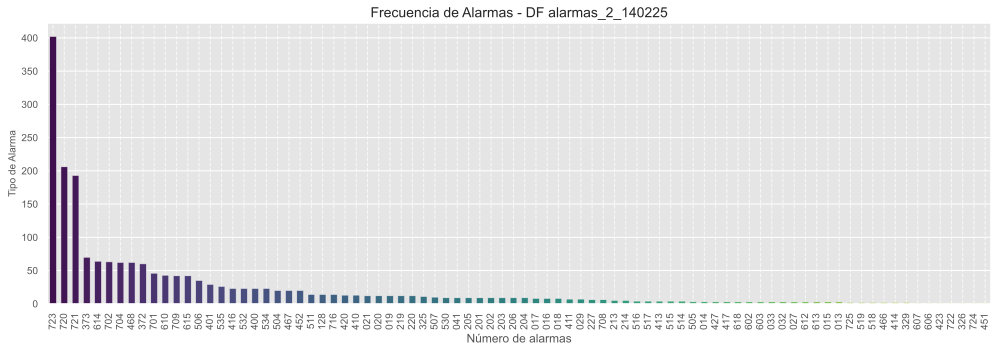

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


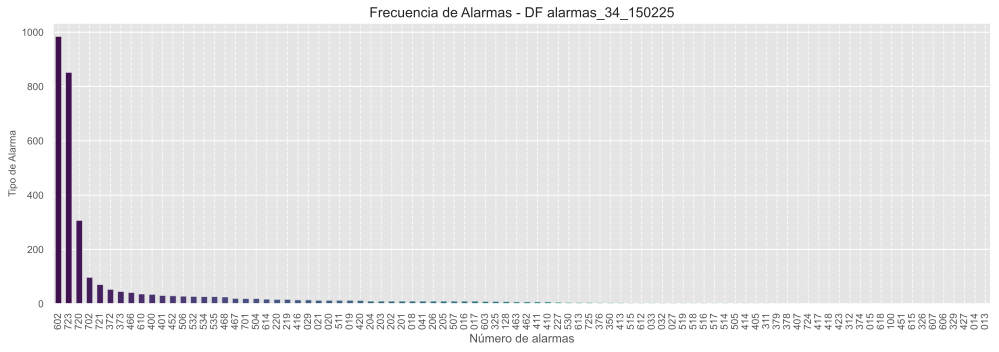

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


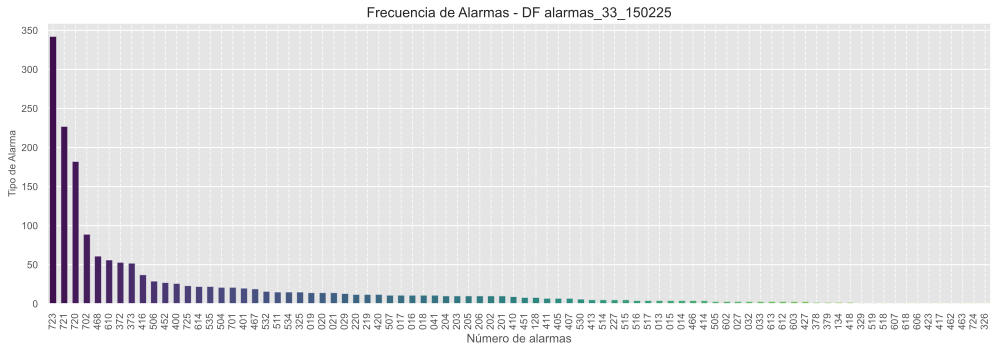

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


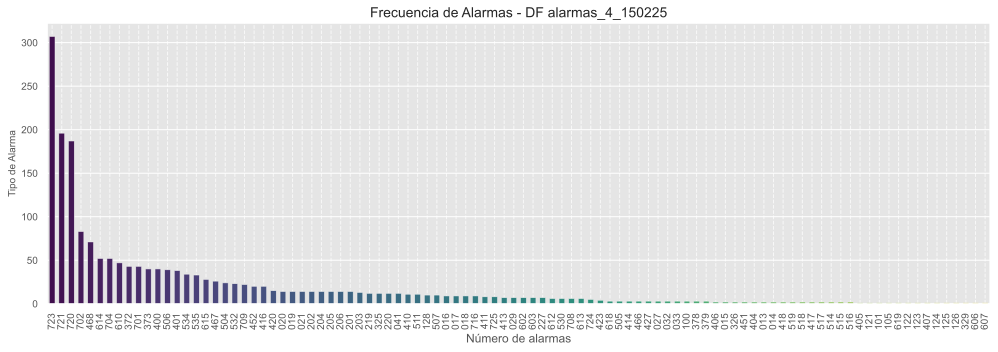

/var/folders/wn/gxtmyy811gg8d_h61xk9hfkm0000gn/T/ipykernel_2751/812933155.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Alarma", y="Número de alarmas", palette="viridis", width=0.6)


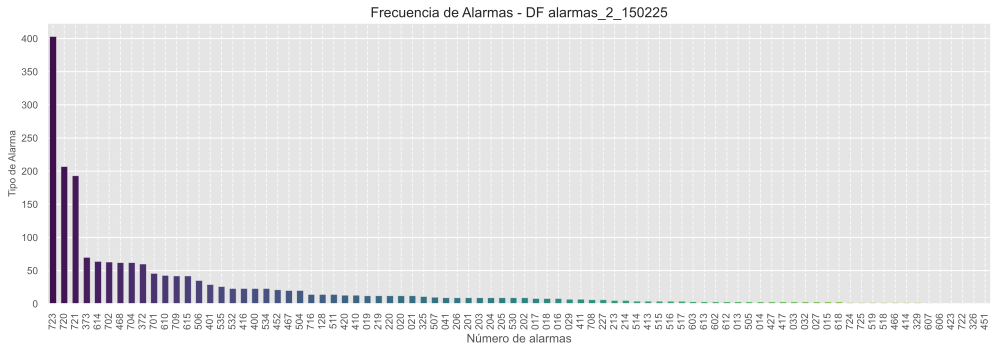

In [12]:
plot_alarm_histograms(lista_df_alarmas, lista_nombres_df_alarmas)

#Las top 3 más frecuentes son 723, 721 y 720

### TABLA TOP 3 ALARMAS MÁS FRECUENTES POR TIPO DE INVERSOR

In [13]:
# JUNTO LOS CSVS DE LA INFO DE ALARMAS DEL MISMO INVERSOR
##########################################################

#Inv 34
alarmas_inv34 = pd.concat([alarmas_34, alarmas_34_140225, alarmas_34_150225], ignore_index=True)

#Inv 33
alarmas_inv33 = pd.concat([alarmas_33, alarmas_33_140225, alarmas_33_150225], ignore_index=True)

#Inv 4
alarmas_inv4 = pd.concat([alarmas_4, alarmas_4_140225, alarmas_4_150225], ignore_index=True)

#Inv 2
alarmas_inv2 = pd.concat([alarmas_2, alarmas_2_140225, alarmas_2_150225], ignore_index=True)

In [14]:
# ME QUEDO CON EL TOP 3 ALARMAS MÁS FRECUENTES DE CADA INVERSOR
###############################################################

#Inv 34
alarmas_inv34_agrupado = alarmas_inv34.groupby("Alarma").size().reset_index(name="Número de alarmas")
alarmas_inv34_agrupado_ordenado =alarmas_inv34_agrupado.sort_values(by="Número de alarmas", ascending=False)
alarmas_inv34_agrupado_ordenado["Alarma"] = alarmas_inv34_agrupado_ordenado["Alarma"].str.extract(r"(\d+)", expand=False)
top3_alarmas_inv34 = alarmas_inv34_agrupado_ordenado.head(3)

#Inv 33
alarmas_inv33_agrupado = alarmas_inv33.groupby("Alarma").size().reset_index(name="Número de alarmas")
alarmas_inv33_agrupado_ordenado =alarmas_inv33_agrupado.sort_values(by="Número de alarmas", ascending=False)
alarmas_inv33_agrupado_ordenado["Alarma"] = alarmas_inv33_agrupado_ordenado["Alarma"].str.extract(r"(\d+)", expand=False)
top3_alarmas_inv33 = alarmas_inv33_agrupado_ordenado.head(3)

#Inv 4
alarmas_inv4_agrupado = alarmas_inv4.groupby("Alarma").size().reset_index(name="Número de alarmas")
alarmas_inv4_agrupado_ordenado =alarmas_inv4_agrupado.sort_values(by="Número de alarmas", ascending=False)
alarmas_inv4_agrupado_ordenado["Alarma"] = alarmas_inv4_agrupado_ordenado["Alarma"].str.extract(r"(\d+)", expand=False)
top3_alarmas_inv4 = alarmas_inv4_agrupado_ordenado.head(3)

#Inv 2
alarmas_inv2_agrupado = alarmas_inv2.groupby("Alarma").size().reset_index(name="Número de alarmas")
alarmas_inv2_agrupado_ordenado =alarmas_inv2_agrupado.sort_values(by="Número de alarmas", ascending=False)
alarmas_inv2_agrupado_ordenado["Alarma"] = alarmas_inv2_agrupado_ordenado["Alarma"].str.extract(r"(\d+)", expand=False)
top3_alarmas_inv2 = alarmas_inv2_agrupado_ordenado.head(3)

#Inv 1
alarmas_inv1_agrupado = alarmas_1.groupby("Alarma").size().reset_index(name="Número de alarmas")
alarmas_inv1_agrupado_ordenado =alarmas_inv1_agrupado.sort_values(by="Número de alarmas", ascending=False)
alarmas_inv1_agrupado_ordenado["Alarma"] = alarmas_inv1_agrupado_ordenado["Alarma"].str.extract(r"(\d+)", expand=False)
top3_alarmas_inv1 = alarmas_inv1_agrupado_ordenado.head(3)

In [15]:
#CREAMOS LA TABLA
##################

#Diccionario con clave el inversor y valor una lista con el top3 alarmas más frecuentes (esta lista está ordenada y hemos quitado el prefijo 
#ALARM_ para hacerlo más visual)

top3_alarmas_por_inversor = {
    "Inv_1": top3_alarmas_inv1['Alarma'].tolist(),
    "Inv_2": top3_alarmas_inv2['Alarma'].tolist(),
    "Inv_4": top3_alarmas_inv4['Alarma'].tolist(),
    "Inv_33": top3_alarmas_inv33['Alarma'].tolist(),
    "Inv_34": top3_alarmas_inv34['Alarma'].tolist()
}

df_top3_alarmas_por_inversor = pd.DataFrame.from_dict(top3_alarmas_por_inversor, orient='index', columns=['Top1', 'Top2', 'Top3'])
df_top3_alarmas_por_inversor

,Top1,Top2,Top3
Inv_1,723,400,535
Inv_2,723,720,721
Inv_4,723,721,720
Inv_33,723,721,720
Inv_34,602,723,720


### TABLA TOP 3 ALARMAS MÁS FRECUENTES POR TIPO DÍA

In [16]:
#NO utilizaremos los ficheros de la carpeta SOLAR-IA
#Cone sta tabla podemos ver si cambia el tipo de alarma más frceunete en función de si ha sido un día con un funcionamiento normal (14 y 15 de febrero)
#o si ha sucedido una incidencia (12 y 13 de febrero)

In [17]:
# JUNTO LOS CSVS DE LA INFO DE ALARMAS DEL MISMO DÍA
#####################################################

#14-02-25
alarmas_140225 = pd.concat([alarmas_34_140225, alarmas_33_140225 , alarmas_4_140225, alarmas_2_140225], ignore_index=True)

#15-02-25
alarmas_150225 = pd.concat([alarmas_34_150225, alarmas_33_150225, alarmas_4_150225, alarmas_2_150225], ignore_index=True)

In [18]:
# ME QUEDO CON EL TOP 3 ALARMAS MÁS FRECUENTES DE CADA DÍA
###########################################################

#12-02-25
alarmas_fallo_presion_120225_agrupado = alarmas_fallo_presion_120225.groupby("Alarma").size().reset_index(name="Número de alarmas")
alarmas_fallo_presion_120225_agrupado_ordenado = alarmas_fallo_presion_120225_agrupado.sort_values(by="Número de alarmas", ascending=False)
alarmas_fallo_presion_120225_agrupado_ordenado["Alarma"] = alarmas_fallo_presion_120225_agrupado_ordenado["Alarma"].str.extract(r"(\d+)", expand=False)
top3_alarmas_fallo_presion_120225 = alarmas_fallo_presion_120225_agrupado_ordenado.head(3)

#13-02-25
alarmas_fallo_explosion_congelar_130225_agrupado = alarmas_fallo_explosion_congelar_130225.groupby("Alarma").size().reset_index(name="Número de alarmas")
alarmas_fallo_explosion_congelar_130225_agrupado_ordenado = alarmas_fallo_explosion_congelar_130225_agrupado.sort_values(by="Número de alarmas", ascending=False)
alarmas_fallo_explosion_congelar_130225_agrupado_ordenado["Alarma"] = alarmas_fallo_explosion_congelar_130225_agrupado_ordenado["Alarma"].str.extract(r"(\d+)", expand=False)
top3_alarmas_fallo_explosion_congelar_130225 = alarmas_fallo_explosion_congelar_130225_agrupado_ordenado.head(3)


#14-02-25
alarmas_140225_agrupado = alarmas_140225.groupby("Alarma").size().reset_index(name="Número de alarmas")
alarmas_140225_agrupado_ordenado = alarmas_140225_agrupado.sort_values(by="Número de alarmas", ascending=False)
alarmas_140225_agrupado_ordenado["Alarma"] = alarmas_140225_agrupado_ordenado["Alarma"].str.extract(r"(\d+)", expand=False)
top3_alarmas_140225 = alarmas_140225_agrupado_ordenado.head(3)

#15-02-25
alarmas_150225_agrupado = alarmas_150225.groupby("Alarma").size().reset_index(name="Número de alarmas")
alarmas_150225_agrupado_ordenado = alarmas_150225_agrupado.sort_values(by="Número de alarmas", ascending=False)
alarmas_150225_agrupado_ordenado["Alarma"] = alarmas_150225_agrupado_ordenado["Alarma"].str.extract(r"(\d+)", expand=False)
top3_alarmas_150225 = alarmas_150225_agrupado_ordenado.head(3)

In [19]:
#CREAMOS LA TABLA
##################

#Diccionario con clave el día y valor una lista con el top3 alarmas más frecuentes (esta lista está ordenada y hemos quitado el prefijo 
#ALARM_ para hacerlo más visual)

top3_alarmas_por_dia = {
    "12-02-25 (fallo presión)": top3_alarmas_fallo_presion_120225['Alarma'].tolist(),
    "13-02-25 (fallo explosión tras congelar)": top3_alarmas_fallo_explosion_congelar_130225['Alarma'].tolist(),
    "14-02-25": top3_alarmas_140225['Alarma'].tolist(),
    "15-02-25": top3_alarmas_150225['Alarma'].tolist()
}

df_top3_alarmas_por_dia = pd.DataFrame.from_dict(top3_alarmas_por_dia, orient='index', columns=['Top1', 'Top2', 'Top3'])
df_top3_alarmas_por_dia

#Quizá la alarma 721 está muy relacionada con la presión
#Quizá la alarma 720 puede ser indicativo de explosión tras congelar

#Observando el excel InfoAlarmas_GD402273. Proteus PV. Gestión de alarmas.xlsx vemos que ambas alarmas están relacionadas con el sistema de 
#protección de la humedad.

,Top1,Top2,Top3
12-02-25 (fallo presión),723,721,720
13-02-25 (fallo explosión tras congelar),723,720,721
14-02-25,723,602,720
15-02-25,723,602,720
